In [25]:
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPooling2D
from keras.models import load_model
from keras.utils import custom_object_scope
import os 
from matplotlib import pyplot as plt
import numpy as np
import random

In [2]:
IMG_HEIGHT = 48
IMG_WIDTH = 48
batch_size = 32

In [3]:
train_dir = 'data/train'
validation_dir = 'data/test'

In [41]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=30,
                                   shear_range=0.3,
                                   horizontal_flip=True,
                                   fill_mode='nearest')

In [5]:
val_datagen = ImageDataGenerator(rescale=1./255)

In [7]:
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    color_mode='grayscale',
                                                    target_size=(IMG_HEIGHT,IMG_WIDTH),
                                                    batch_size=batch_size,
                                                    class_mode='categorical',
                                                    shuffle=True)

Found 28709 images belonging to 7 classes.


In [8]:
val_generator = val_datagen.flow_from_directory(validation_dir,
                                                    color_mode='grayscale',
                                                    target_size=(IMG_HEIGHT,IMG_WIDTH),
                                                    batch_size=batch_size,
                                                    class_mode='categorical',
                                                    shuffle=True)

Found 7178 images belonging to 7 classes.


In [9]:
class_labels = ['Angry', 'Disgust','Fear','Happy','Neutral','Sad','Surprise']

In [10]:
img, label = train_generator.__next__()

In [11]:
i = random.randint(0,(img.shape[0])-1)

In [12]:
image = img[i]

In [13]:
label = class_labels[label[i].argmax()]

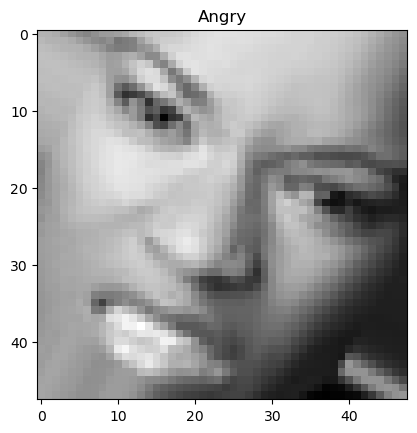

In [14]:
plt.imshow(image[:,:,0],cmap='gray')
plt.title(label)
plt.show()

## Create the model

In [51]:
model =Sequential()
model.add(Conv2D(32,kernel_size=(3,3),
                 activation='relu',
                 input_shape=(48,48,1)))

model.add(Conv2D(64,kernel_size=(3,3),
                 activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.1))

model.add(Conv2D(128,kernel_size=(3,3),
                 activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.1))

model.add(Conv2D(256,kernel_size=(3,3),
                 activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.1))

model.add(Flatten())
model.add(Dense(512,activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(7,activation='softmax'))

model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
print(model.compile)

<bound method Model.compile of <keras.src.engine.sequential.Sequential object at 0x0000016B69DA7820>>


In [44]:
train_path = 'data/train'
test_path = 'data/test' 

In [45]:
trainImgNum = 0

In [46]:
for root, dirs, files in os.walk(train_path):
    trainImgNum+=len(files)

In [47]:
testImgNum = 0

In [48]:
for root,dirs,files in os.walk(test_path):
    testImgNum += len(files)

In [49]:
epochs = 50

In [52]:
history = model.fit(train_generator,
                    steps_per_epoch=trainImgNum // batch_size,
                    epochs=epochs,
                    validation_data=val_generator,
                    validation_steps=testImgNum // batch_size)

Epoch 1/50
897/897 [==============================] - 228s 252ms/step - loss: 1.7396 - accuracy: 0.2898 - val_loss: 1.5606 - val_accuracy: 0.3901
Epoch 2/50
897/897 [==============================] - 104s 116ms/step - loss: 1.5061 - accuracy: 0.4080 - val_loss: 1.3726 - val_accuracy: 0.4816
Epoch 3/50
897/897 [==============================] - 102s 113ms/step - loss: 1.3700 - accuracy: 0.4746 - val_loss: 1.2528 - val_accuracy: 0.5159
Epoch 4/50
897/897 [==============================] - 101s 113ms/step - loss: 1.2961 - accuracy: 0.5028 - val_loss: 1.2243 - val_accuracy: 0.5304
Epoch 5/50
897/897 [==============================] - 99s 111ms/step - loss: 1.2518 - accuracy: 0.5246 - val_loss: 1.1693 - val_accuracy: 0.5551
Epoch 6/50
897/897 [==============================] - 99s 111ms/step - loss: 1.2268 - accuracy: 0.5340 - val_loss: 1.1564 - val_accuracy: 0.5548
Epoch 7/50
897/897 [==============================] - 102s 114ms/step - loss: 1.1943 - accuracy: 0.5475 - val_loss: 1.1444 - v

In [55]:
model.save('Emotion_Detection_50epochs.h5')

C:\Anaconda\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


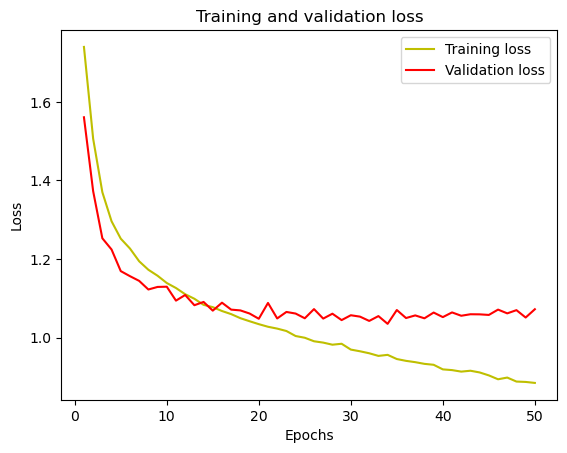

In [53]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1,len(loss) + 1)
plt.plot(epochs, loss, 'y',label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

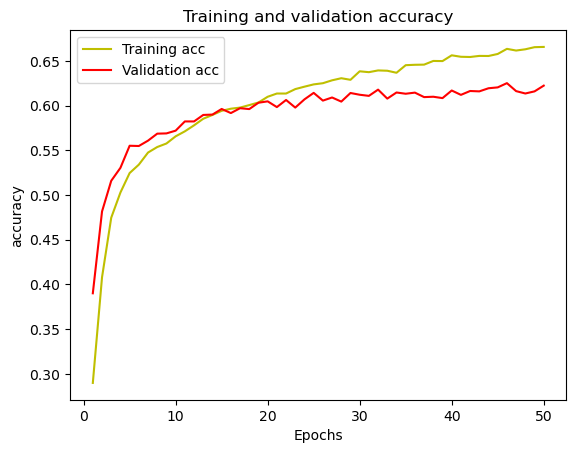

In [54]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'y',label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

## Test the model

In [63]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [56]:
my_model = load_model('Emotion_Detection_50epochs.h5', compile=False)

In [58]:
testImg, testLbl = val_generator.__next__()
pred = my_model.predict(testImg)

pred = np.argmax(pred, axis=1)
testLabel = np.argmax(testLbl, axis=1)

1/1 [==============================] - 0s 29ms/step


In [61]:
print("Accuracy = ", metrics.accuracy_score(testLabel, pred))

Accuracy =  0.4375


In [64]:
cm = confusion_matrix(testLabel, pred)
print(cm)

[[1 0 0 1 2 0]
 [1 1 0 2 0 1]
 [1 1 4 1 0 1]
 [1 0 0 2 3 0]
 [1 0 1 1 2 0]
 [0 0 0 0 0 4]]


<AxesSubplot:>

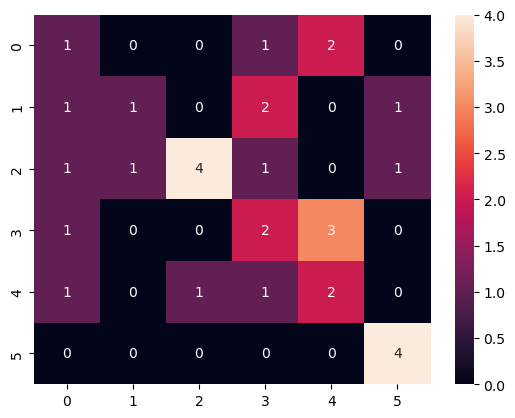

In [65]:
sns.heatmap(cm, annot=True)

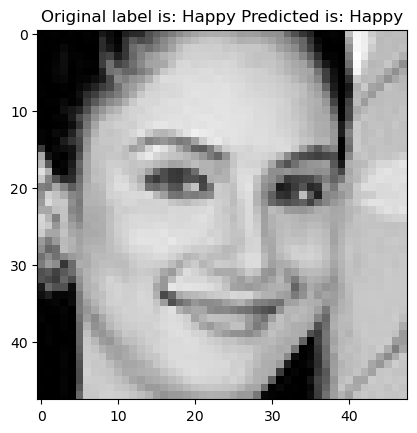

In [77]:
n = random.randint(0, testImg.shape[0]-1)
image = testImg[n]
origi_label = class_labels[testLabel[n]]
predLabel = class_labels[pred[n]]
plt.imshow(image[:,:,0], cmap='gray')
plt.title('Original label is: '+origi_label+' Predicted is: '+predLabel)
plt.show()